# Análisis Exploratorio


--- daily-total-female-births.csv ---


,Births
Date,
1959-01-01,35
1959-01-02,32
1959-01-03,30
1959-01-04,31
1959-01-05,44


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 365 entries, 1959-01-01 to 1959-12-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Births  365 non-null    int64
dtypes: int64(1)
memory usage: 5.7 KB
None



,Births
count,365.000000
mean,41.980822
std,7.348257
min,23.000000
25%,37.000000
50%,42.000000
75%,46.000000
max,73.000000


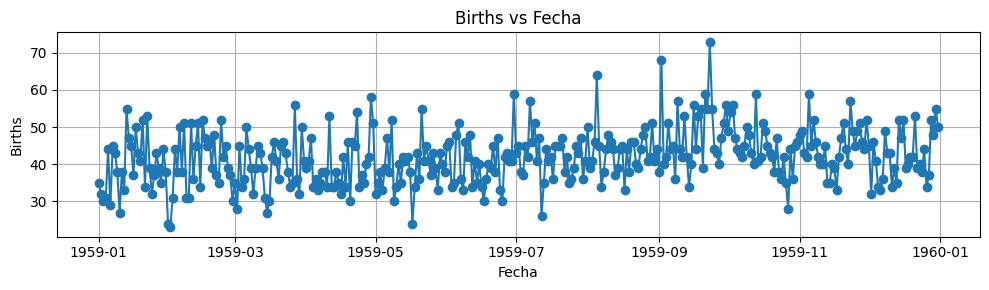

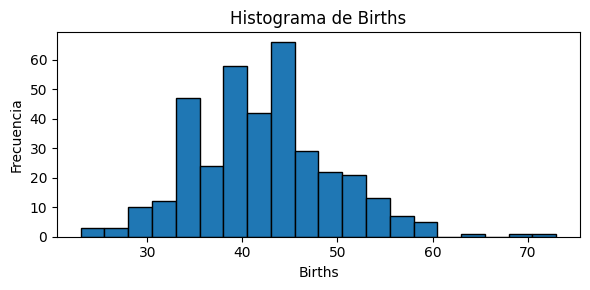

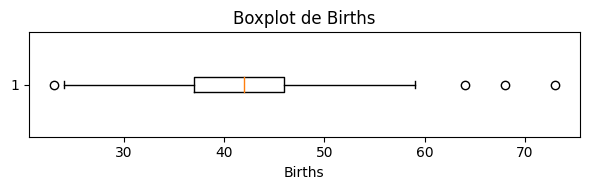

<Figure size 600x300 with 0 Axes>

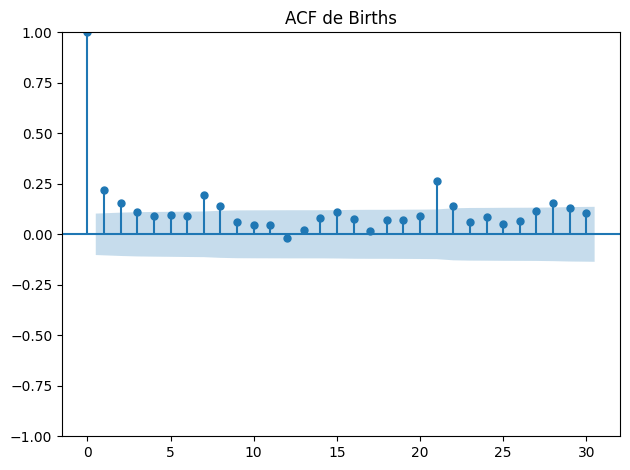


--- shampoo.csv ---


C:\Users\Eduar\AppData\Local\Temp\ipykernel_17664\2731018336.py:15: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv(filepath, parse_dates=[date_col], index_col=date_col)


,Sales
Month,
1-01,266.0
1-02,145.9
1-03,183.1
1-04,119.3
1-05,180.3


<class 'pandas.core.frame.DataFrame'>
Index: 36 entries, 1-01 to 3-12
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Sales   36 non-null     float64
dtypes: float64(1)
memory usage: 576.0+ bytes
None



,Sales
count,36.000000
mean,312.600000
std,148.937164
min,119.300000
25%,192.450000
50%,280.150000
75%,411.100000
max,682.000000


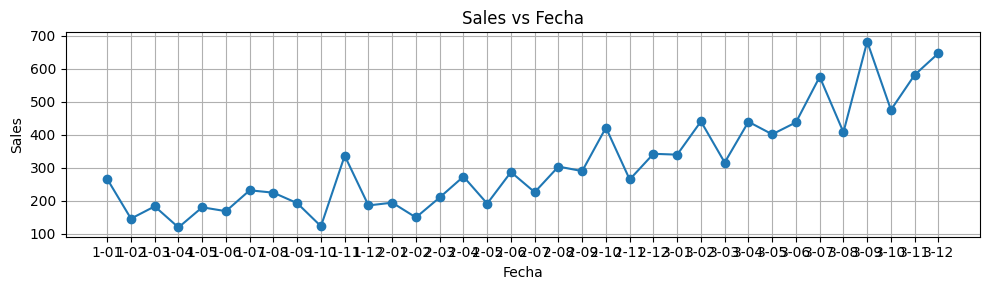

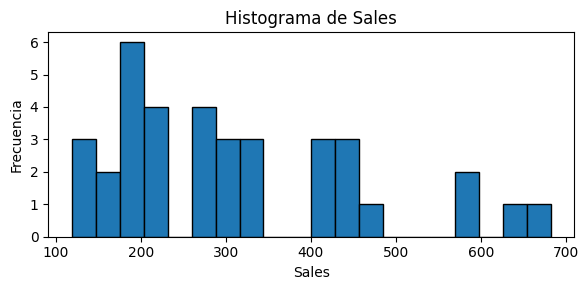

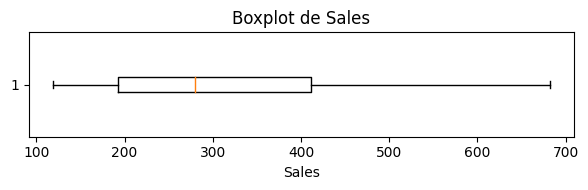

<Figure size 600x300 with 0 Axes>

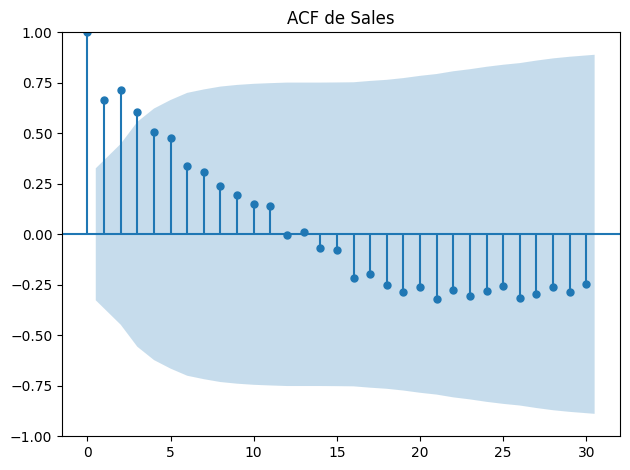


--- monthly-mean-temp.csv ---


,Temperature
Month,
1920-01-01,40.6
1920-02-01,40.8
1920-03-01,44.4
1920-04-01,46.7
1920-05-01,54.1


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 240 entries, 1920-01-01 to 1939-12-01
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  240 non-null    float64
dtypes: float64(1)
memory usage: 3.8 KB
None



,Temperature
count,240.000000
mean,49.041250
std,8.569705
min,31.300000
25%,41.550000
50%,47.350000
75%,57.000000
max,66.500000


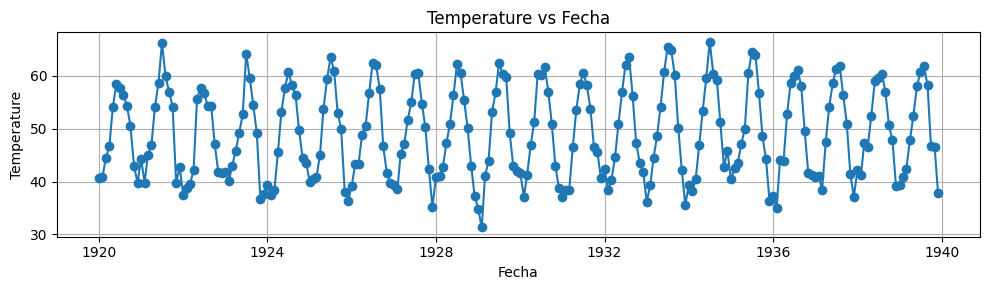

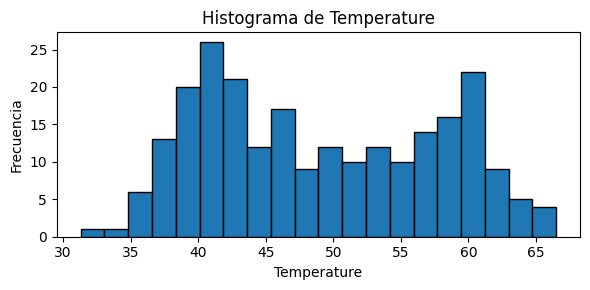

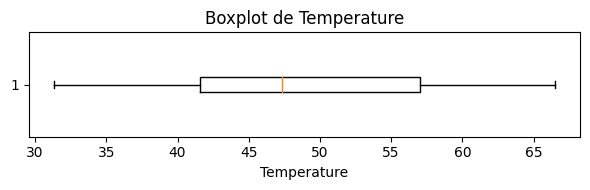

<Figure size 600x300 with 0 Axes>

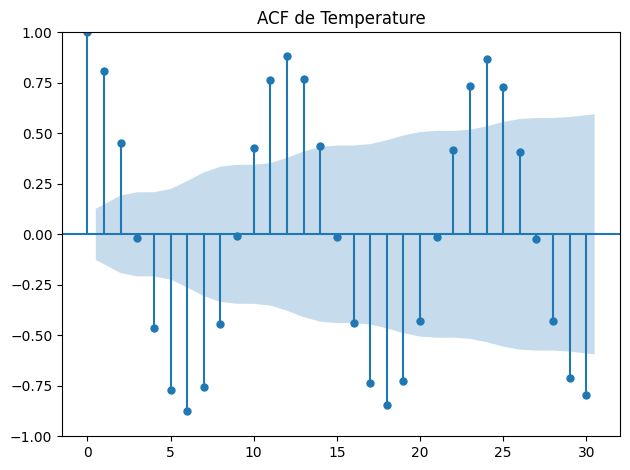


--- monthly-car-sales.csv ---


,Sales
Month,
1960-01-01,6550
1960-02-01,8728
1960-03-01,12026
1960-04-01,14395
1960-05-01,14587


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 108 entries, 1960-01-01 to 1968-12-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Sales   108 non-null    int64
dtypes: int64(1)
memory usage: 1.7 KB
None



,Sales
count,108.000000
mean,14595.111111
std,4525.213913
min,5568.000000
25%,11391.250000
50%,14076.000000
75%,17595.750000
max,26099.000000


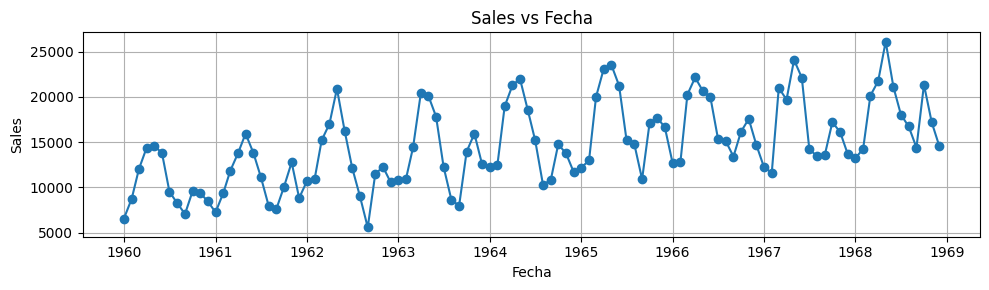

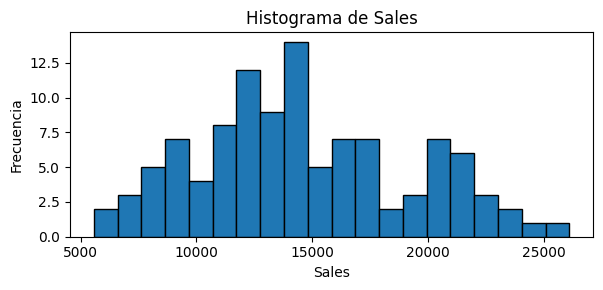

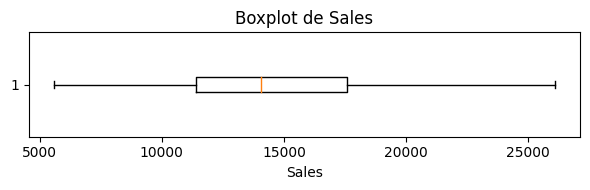

<Figure size 600x300 with 0 Axes>

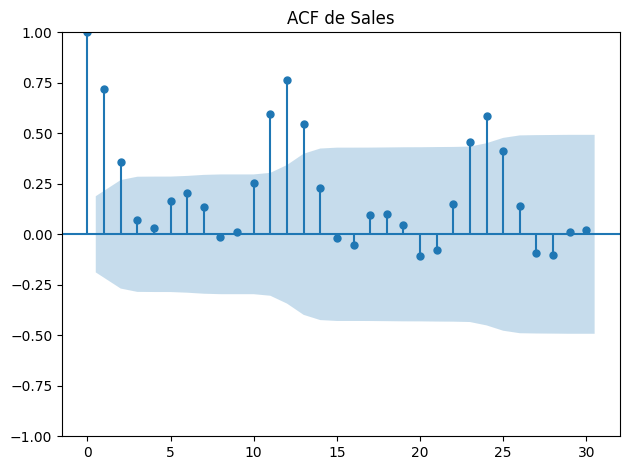

In [ ]:

import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf

def eda_series(filepath, date_col, value_col, freq=None):

    df = pd.read_csv(filepath, parse_dates=[date_col], index_col=date_col)
    if freq:
        df = df.asfreq(freq)
    
    print(f"\n--- {filepath} ---")
    display(df.head())
    print(df.info(), end="\n\n")
    display(df.describe())
    
    plt.figure(figsize=(10, 3))
    plt.plot(df.index, df[value_col], marker='o', linestyle='-')
    plt.title(f"{value_col} vs Fecha")
    plt.xlabel("Fecha")
    plt.ylabel(value_col)
    plt.grid(True)
    plt.tight_layout()
    plt.show()
    
    plt.figure(figsize=(6, 3))
    plt.hist(df[value_col].dropna(), bins=20, edgecolor='k')
    plt.title(f"Histograma de {value_col}")
    plt.xlabel(value_col)
    plt.ylabel("Frecuencia")
    plt.tight_layout()
    plt.show()
    
    plt.figure(figsize=(6, 2))
    plt.boxplot(df[value_col].dropna(), vert=False)
    plt.title(f"Boxplot de {value_col}")
    plt.xlabel(value_col)
    plt.tight_layout()
    plt.show()
    
    plt.figure(figsize=(6, 3))
    plot_acf(df[value_col].dropna(), lags=30)
    plt.title(f"ACF de {value_col}")
    plt.tight_layout()
    plt.show()


series = [
    ("daily-total-female-births.csv", "Date",        "Births"),
    ("shampoo.csv",               "Month",       "Sales"),
    ("monthly-mean-temp.csv",     "Month",       "Temperature"),
    ("monthly-car-sales.csv",     "Month",       "Sales"),
]

for fp, dtc, valc in series:
    eda_series(fp, dtc, valc, fq)


# Promedios Móviles

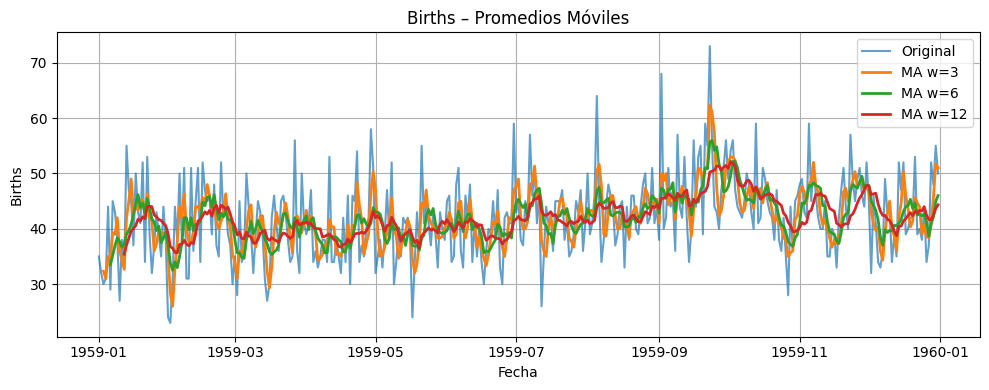

C:\Users\Eduar\AppData\Local\Temp\ipykernel_17664\611152053.py:20: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv(filepath, parse_dates=[date_col], index_col=date_col)


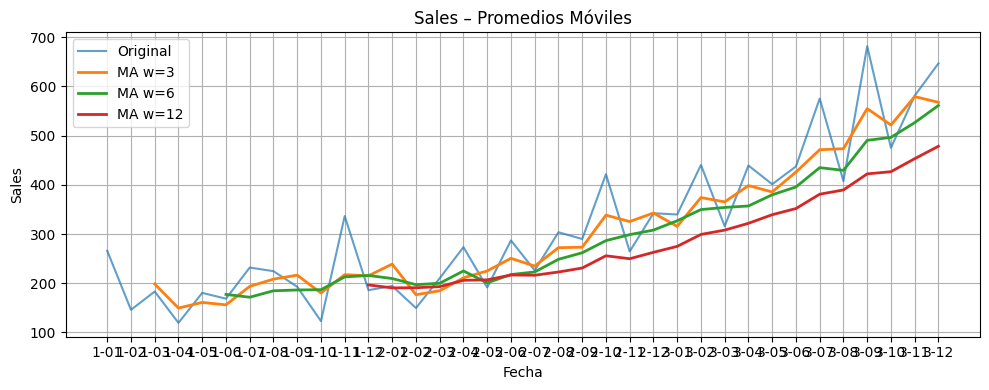

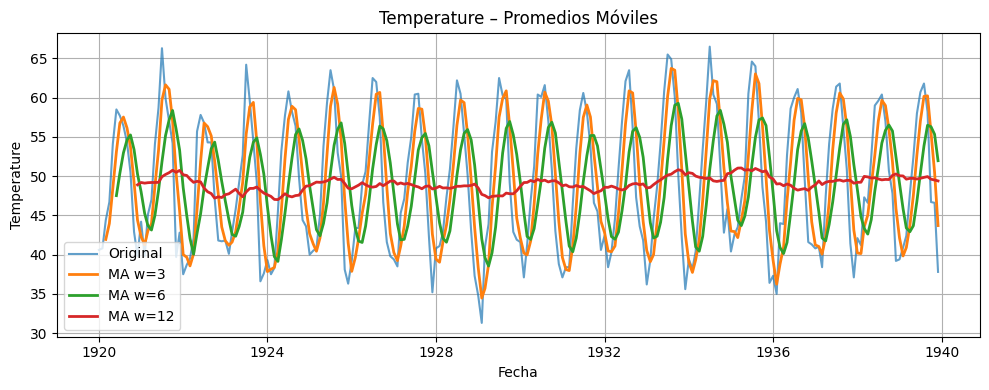

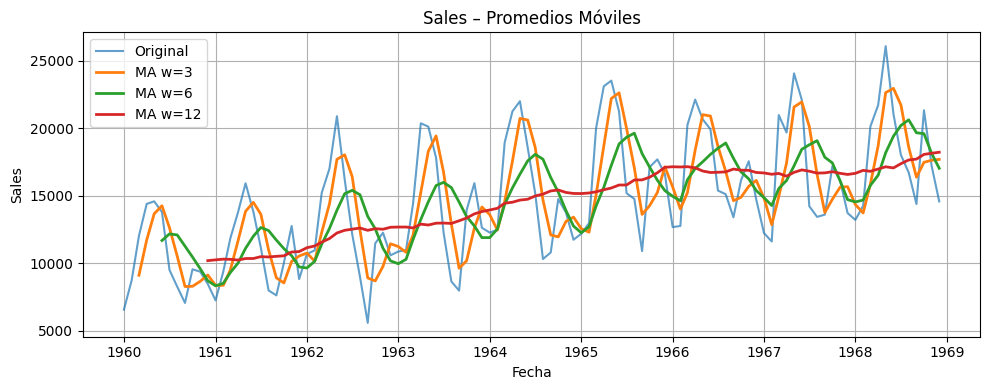

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

series = [
    ("daily-total-female-births.csv", "Date",        "Births"),
    ("shampoo.csv",               "Month",       "Sales"),
    ("monthly-mean-temp.csv",     "Month",       "Temperature"),
    ("monthly-car-sales.csv",     "Month",       "Sales"),
]

ventanas = [3, 6, 12]

for filepath, date_col, value_col in series:
    df = pd.read_csv(filepath, parse_dates=[date_col], index_col=date_col)

    for w in ventanas:
        df[f"MA_{w}"] = df[value_col].rolling(window=w).mean()

    plt.figure(figsize=(10, 4))
    plt.plot(df[value_col], label="Original", alpha=0.7)
    for w in ventanas:
        plt.plot(df[f"MA_{w}"], label=f"MA w={w}", linewidth=2)
    
    plt.title(f"{value_col} – Promedios Móviles")
    plt.xlabel("Fecha")
    plt.ylabel(value_col)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


# Alisamiento Exponencial y holt Winters

C:\Users\Eduar\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Eduar\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


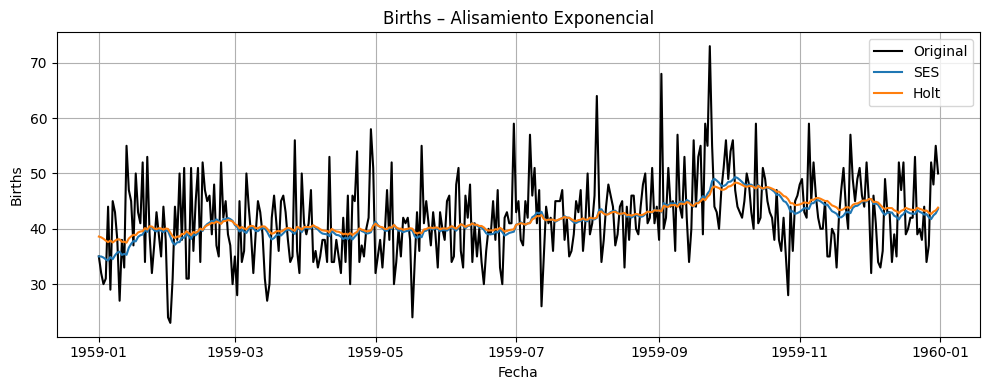


Errores en 'Births':
  SES      RMSE=7.07, MAE=5.59
  Holt     RMSE=7.04, MAE=5.58

------------------------------------------------------------



C:\Users\Eduar\AppData\Local\Temp\ipykernel_17664\3371252764.py:20: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv(filepath, parse_dates=[date_col], index_col=date_col)
C:\Users\Eduar\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:559: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  _index = to_datetime(index)
C:\Users\Eduar\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
C:\Users\Eduar\AppData\Roaming\Python\Python311\site-pack

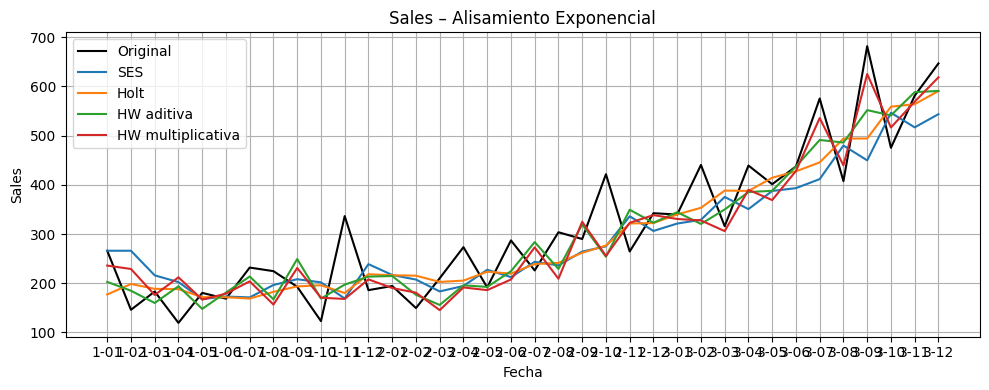


Errores en 'Sales':
  SES      RMSE=82.94, MAE=65.58
  Holt     RMSE=71.21, MAE=54.96
  HW_add   RMSE=66.21, MAE=53.18
  HW_mul   RMSE=62.64, MAE=47.59

------------------------------------------------------------



C:\Users\Eduar\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Eduar\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Eduar\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Eduar\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


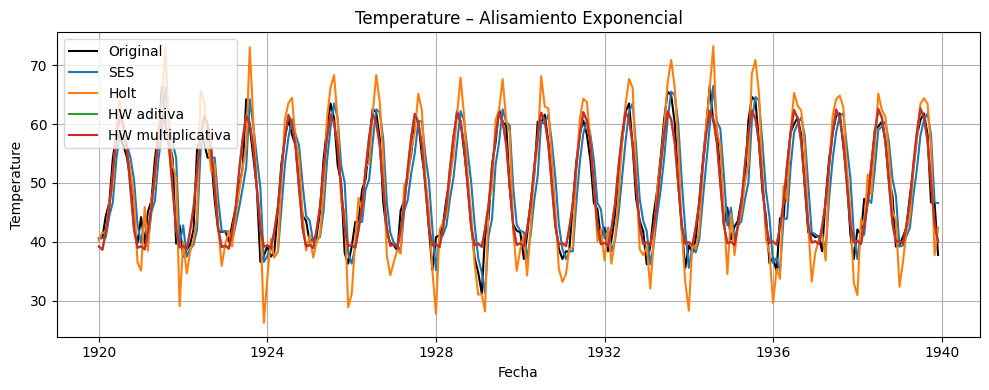


Errores en 'Temperature':
  SES      RMSE=5.22, MAE=4.30
  Holt     RMSE=5.06, MAE=4.01
  HW_add   RMSE=2.23, MAE=1.74
  HW_mul   RMSE=2.22, MAE=1.74

------------------------------------------------------------



C:\Users\Eduar\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Eduar\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Eduar\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Eduar\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Eduar\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferre

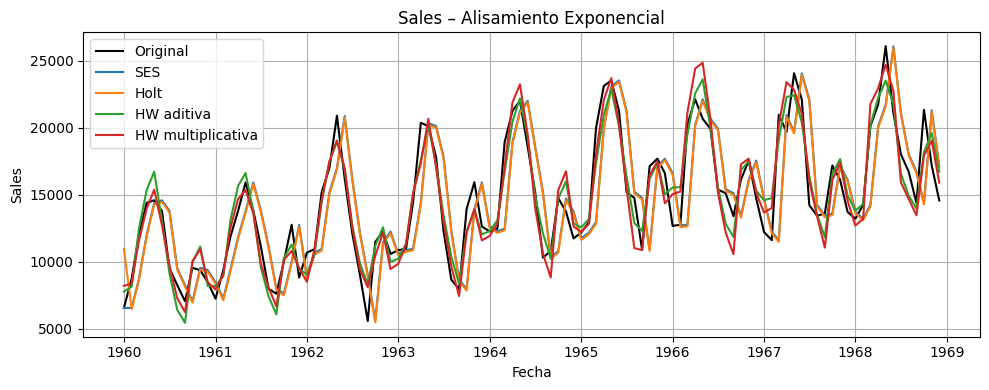


Errores en 'Sales':
  SES      RMSE=3300.84, MAE=2609.60
  Holt     RMSE=3332.69, MAE=2645.09
  HW_add   RMSE=1432.71, MAE=1154.36
  HW_mul   RMSE=1477.77, MAE=1161.19

------------------------------------------------------------



In [ ]:

import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, ExponentialSmoothing
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

series = [
    ("daily-total-female-births.csv", "Date",        "Births",      None),
    ("shampoo.csv",               "Month",       "Sales",       12),
    ("monthly-mean-temp.csv",     "Month",       "Temperature", 12),
    ("monthly-car-sales.csv",     "Month",       "Sales",       12),
]

for filepath, date_col, value_col, season in series:
    df = pd.read_csv(filepath, parse_dates=[date_col], index_col=date_col)
    
    ses = SimpleExpSmoothing(df[value_col]).fit(optimized=True)
    df['SES'] = ses.fittedvalues

    holt = ExponentialSmoothing(df[value_col], trend='add', seasonal=None) \
           .fit(optimized=True)
    df['Holt'] = holt.fittedvalues

    if season:
        hw_add = ExponentialSmoothing(df[value_col],
                                      trend='add',
                                      seasonal='add',
                                      seasonal_periods=season) \
                 .fit(optimized=True)
        df['HW_add'] = hw_add.fittedvalues
        
        hw_mul = ExponentialSmoothing(df[value_col],
                                      trend='add',
                                      seasonal='mul',
                                      seasonal_periods=season) \
                 .fit(optimized=True)
        df['HW_mul'] = hw_mul.fittedvalues

    # 3. Graficar resultados
    plt.figure(figsize=(10, 4))
    plt.plot(df[value_col], label='Original', color='black')
    plt.plot(df['SES'],   label='SES')
    plt.plot(df['Holt'],  label='Holt')
    if season:
        plt.plot(df['HW_add'], label='HW aditiva')
        plt.plot(df['HW_mul'], label='HW multiplicativa')
    plt.title(f"{value_col} – Alisamiento Exponencial")
    plt.xlabel("Fecha")
    plt.ylabel(value_col)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    print(f"\nErrores en '{value_col}':")
    methods = ['SES','Holt'] + (['HW_add','HW_mul'] if season else [])
    for m in methods:
        rmse = np.sqrt(mean_squared_error(df[value_col], df[m]))
        mae  = mean_absolute_error(df[value_col], df[m])
        print(f"  {m:<8} RMSE={rmse:.2f}, MAE={mae:.2f}")
    print("\n" + "-"*60 + "\n")
